### EXPLORATORY DATA ANALYSIS ON DATASET

#### 1) Data cleaning and preparation:
* importing all necessory python libraries


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline


* Load the dataset

In [5]:
#load the dataset
df=pd.read_csv(r"C:\Users\Akshata\OneDrive\Desktop\Assignment\EDA1\Cardiotocographic.csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


*  Handling missing values

In [7]:
missing_values=df.isnull().sum()
print('missing values in each column:\n',missing_values)

missing values in each column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


●	Identify and correct any inconsistencies in data types 

In [9]:
# Check data types
print(df.dtypes)

# Convert columns to appropriate columns for correct calc
# Example: If 'LB' is read as string, convert to float
# df_clean['LB'] = pd.to_numeric(df_clean['LB'], errors='coerce')

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


●	Detect and treat outliers if necessary.

In [11]:
#identifying the potential outliers using z-score or IQR
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1

#display summery statistics
summary=df.describe()

#filter outliers using IQR rule
outliers = df[(df < q1-(1.5*IQR) | (df> q3-(1.5*IQR))).any(axis=1)]

print('missing values:',missing_values)
print('summery statistics:',summary)
print('outliers:',outliers)

missing values: LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
summery statistics:                 LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \


#### 2.	Statistical Summary:
* statistical summary 

In [13]:
#displaying summary of each variable in the dataset
summary=df.describe()
#display summary
summary

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


#### 3.	Data Visualization:
●	Create histograms or boxplots to visualize the distributions of various numerical variables.

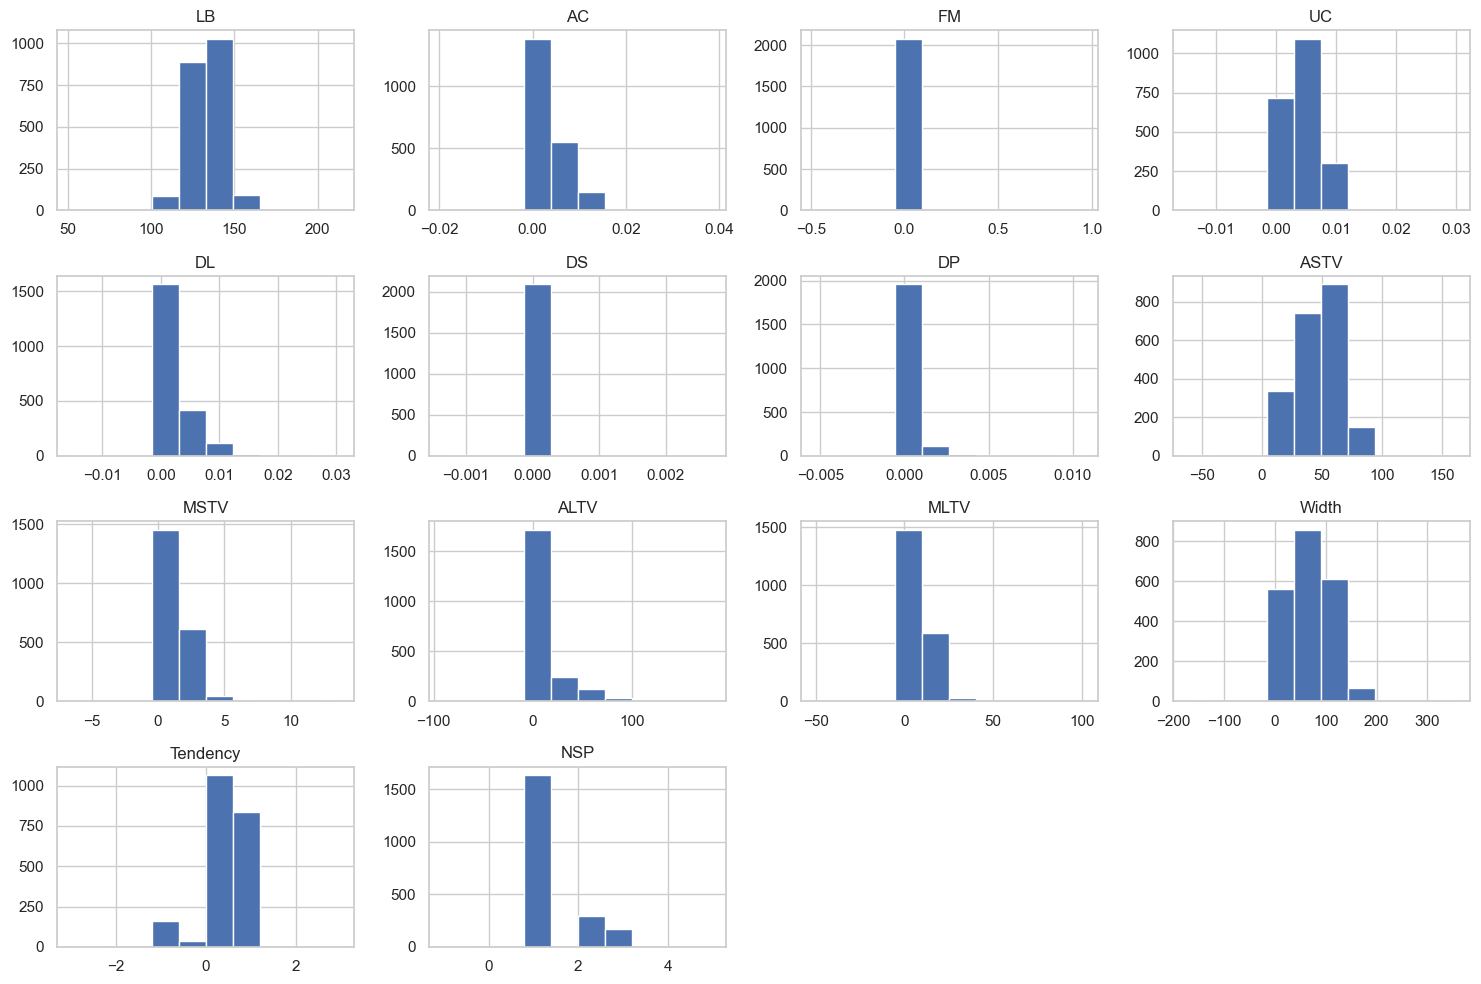

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Each numeric column gets its own subplot.
df.hist(figsize=(15,10))  
plt.tight_layout()
plt.show()

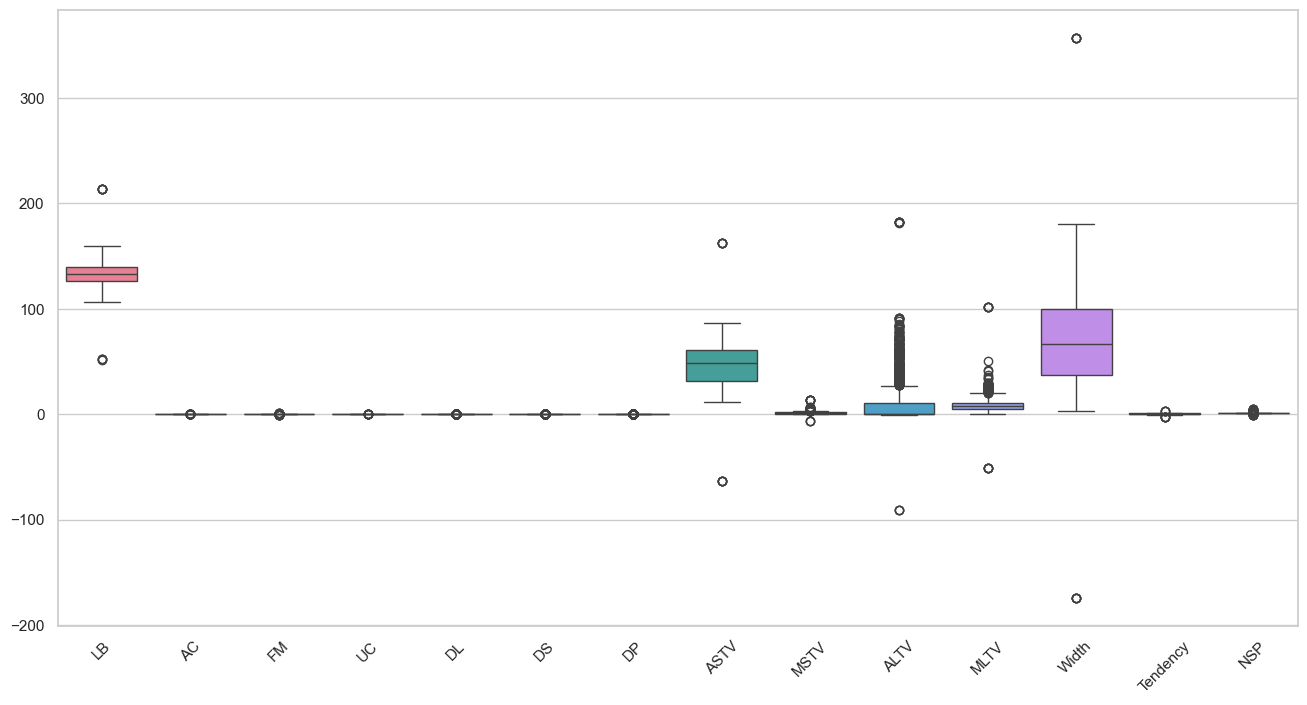

In [32]:
# boxplot is used to find outliers
import matplotlib.pyplot as plt,seaborn as sns
plt.figure(figsize=(16,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

<Figure size 800x600 with 0 Axes>

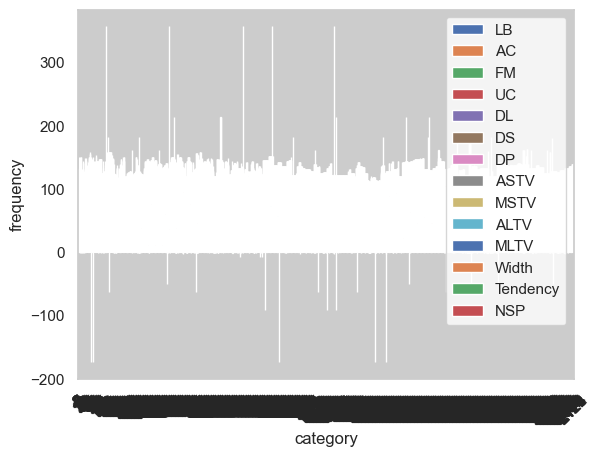

In [66]:


plt.figure(figsize=(8, 6))
df.plot(kind='bar')
plt.xlabel('category')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.show()

●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

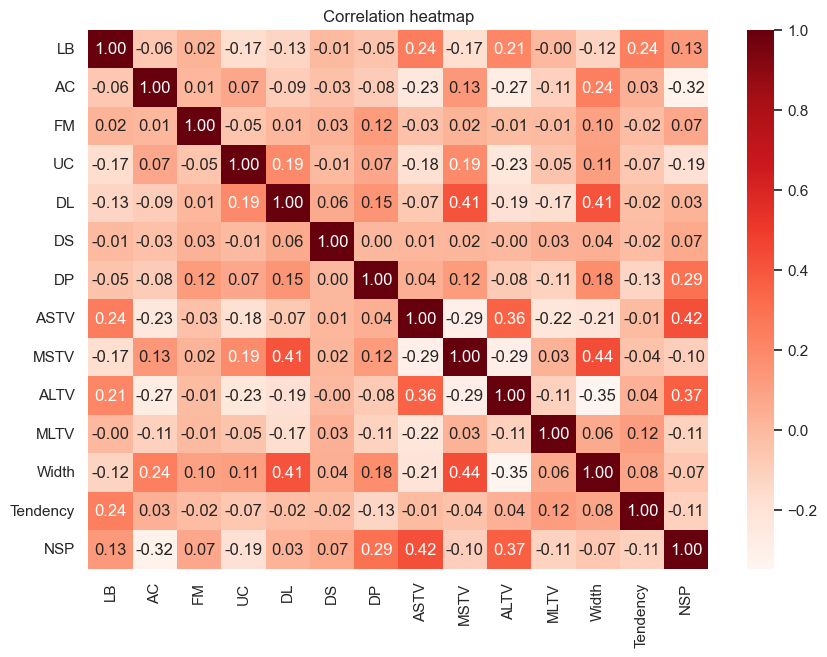

In [80]:
#heatmap

#plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds', fmt=".2f")
#fmt=".2f": Formats the annotated correlation values to two decimal places and cmap=sets the color map
plt.title('Correlation heatmap')
plt.show()

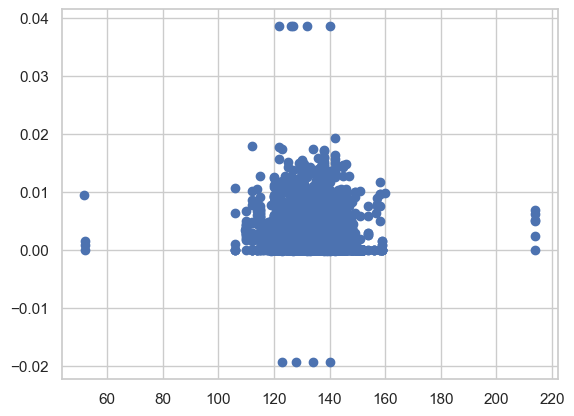

In [113]:
plt.scatter(x='LB',y='AC',data=df)
plt.show()


In [109]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063830,0.018777,-0.166570,-0.126959,-0.005438,-0.047724,0.242625,-0.170473,0.210728,-0.003457,-0.118425,0.236864,0.131843
AC,-0.063830,1.000000,0.009433,0.072012,-0.093507,-0.033623,-0.084590,-0.231103,0.134168,-0.271390,-0.106529,0.238436,0.032481,-0.316941
FM,0.018777,0.009433,1.000000,-0.053226,0.009718,0.029901,0.121284,-0.032691,0.017055,-0.011936,-0.006237,0.097213,-0.018339,0.074054
UC,-0.166570,0.072012,-0.053226,1.000000,0.190128,-0.006937,0.070658,-0.181161,0.189406,-0.227304,-0.049460,0.107397,-0.066610,-0.185411
DL,-0.126959,-0.093507,0.009718,0.190128,1.000000,0.058625,0.145425,-0.069361,0.410102,-0.186967,-0.165750,0.410031,-0.023569,0.025427
DS,-0.005438,-0.033623,0.029901,-0.006937,0.058625,1.000000,0.004285,0.008452,0.016163,-0.004398,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.084590,0.121284,0.070658,0.145425,0.004285,1.000000,0.038238,0.119892,-0.077758,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.242625,-0.231103,-0.032691,-0.181161,-0.069361,0.008452,0.038238,1.000000,-0.293882,0.357497,-0.220427,-0.207599,-0.010927,0.422652
MSTV,-0.170473,0.134168,0.017055,0.189406,0.410102,0.016163,0.119892,-0.293882,1.000000,-0.291935,0.028934,0.435393,-0.036857,-0.095139
ALTV,0.210728,-0.271390,-0.011936,-0.227304,-0.186967,-0.004398,-0.077758,0.357497,-0.291935,1.000000,-0.107712,-0.346460,0.036771,0.365846


●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

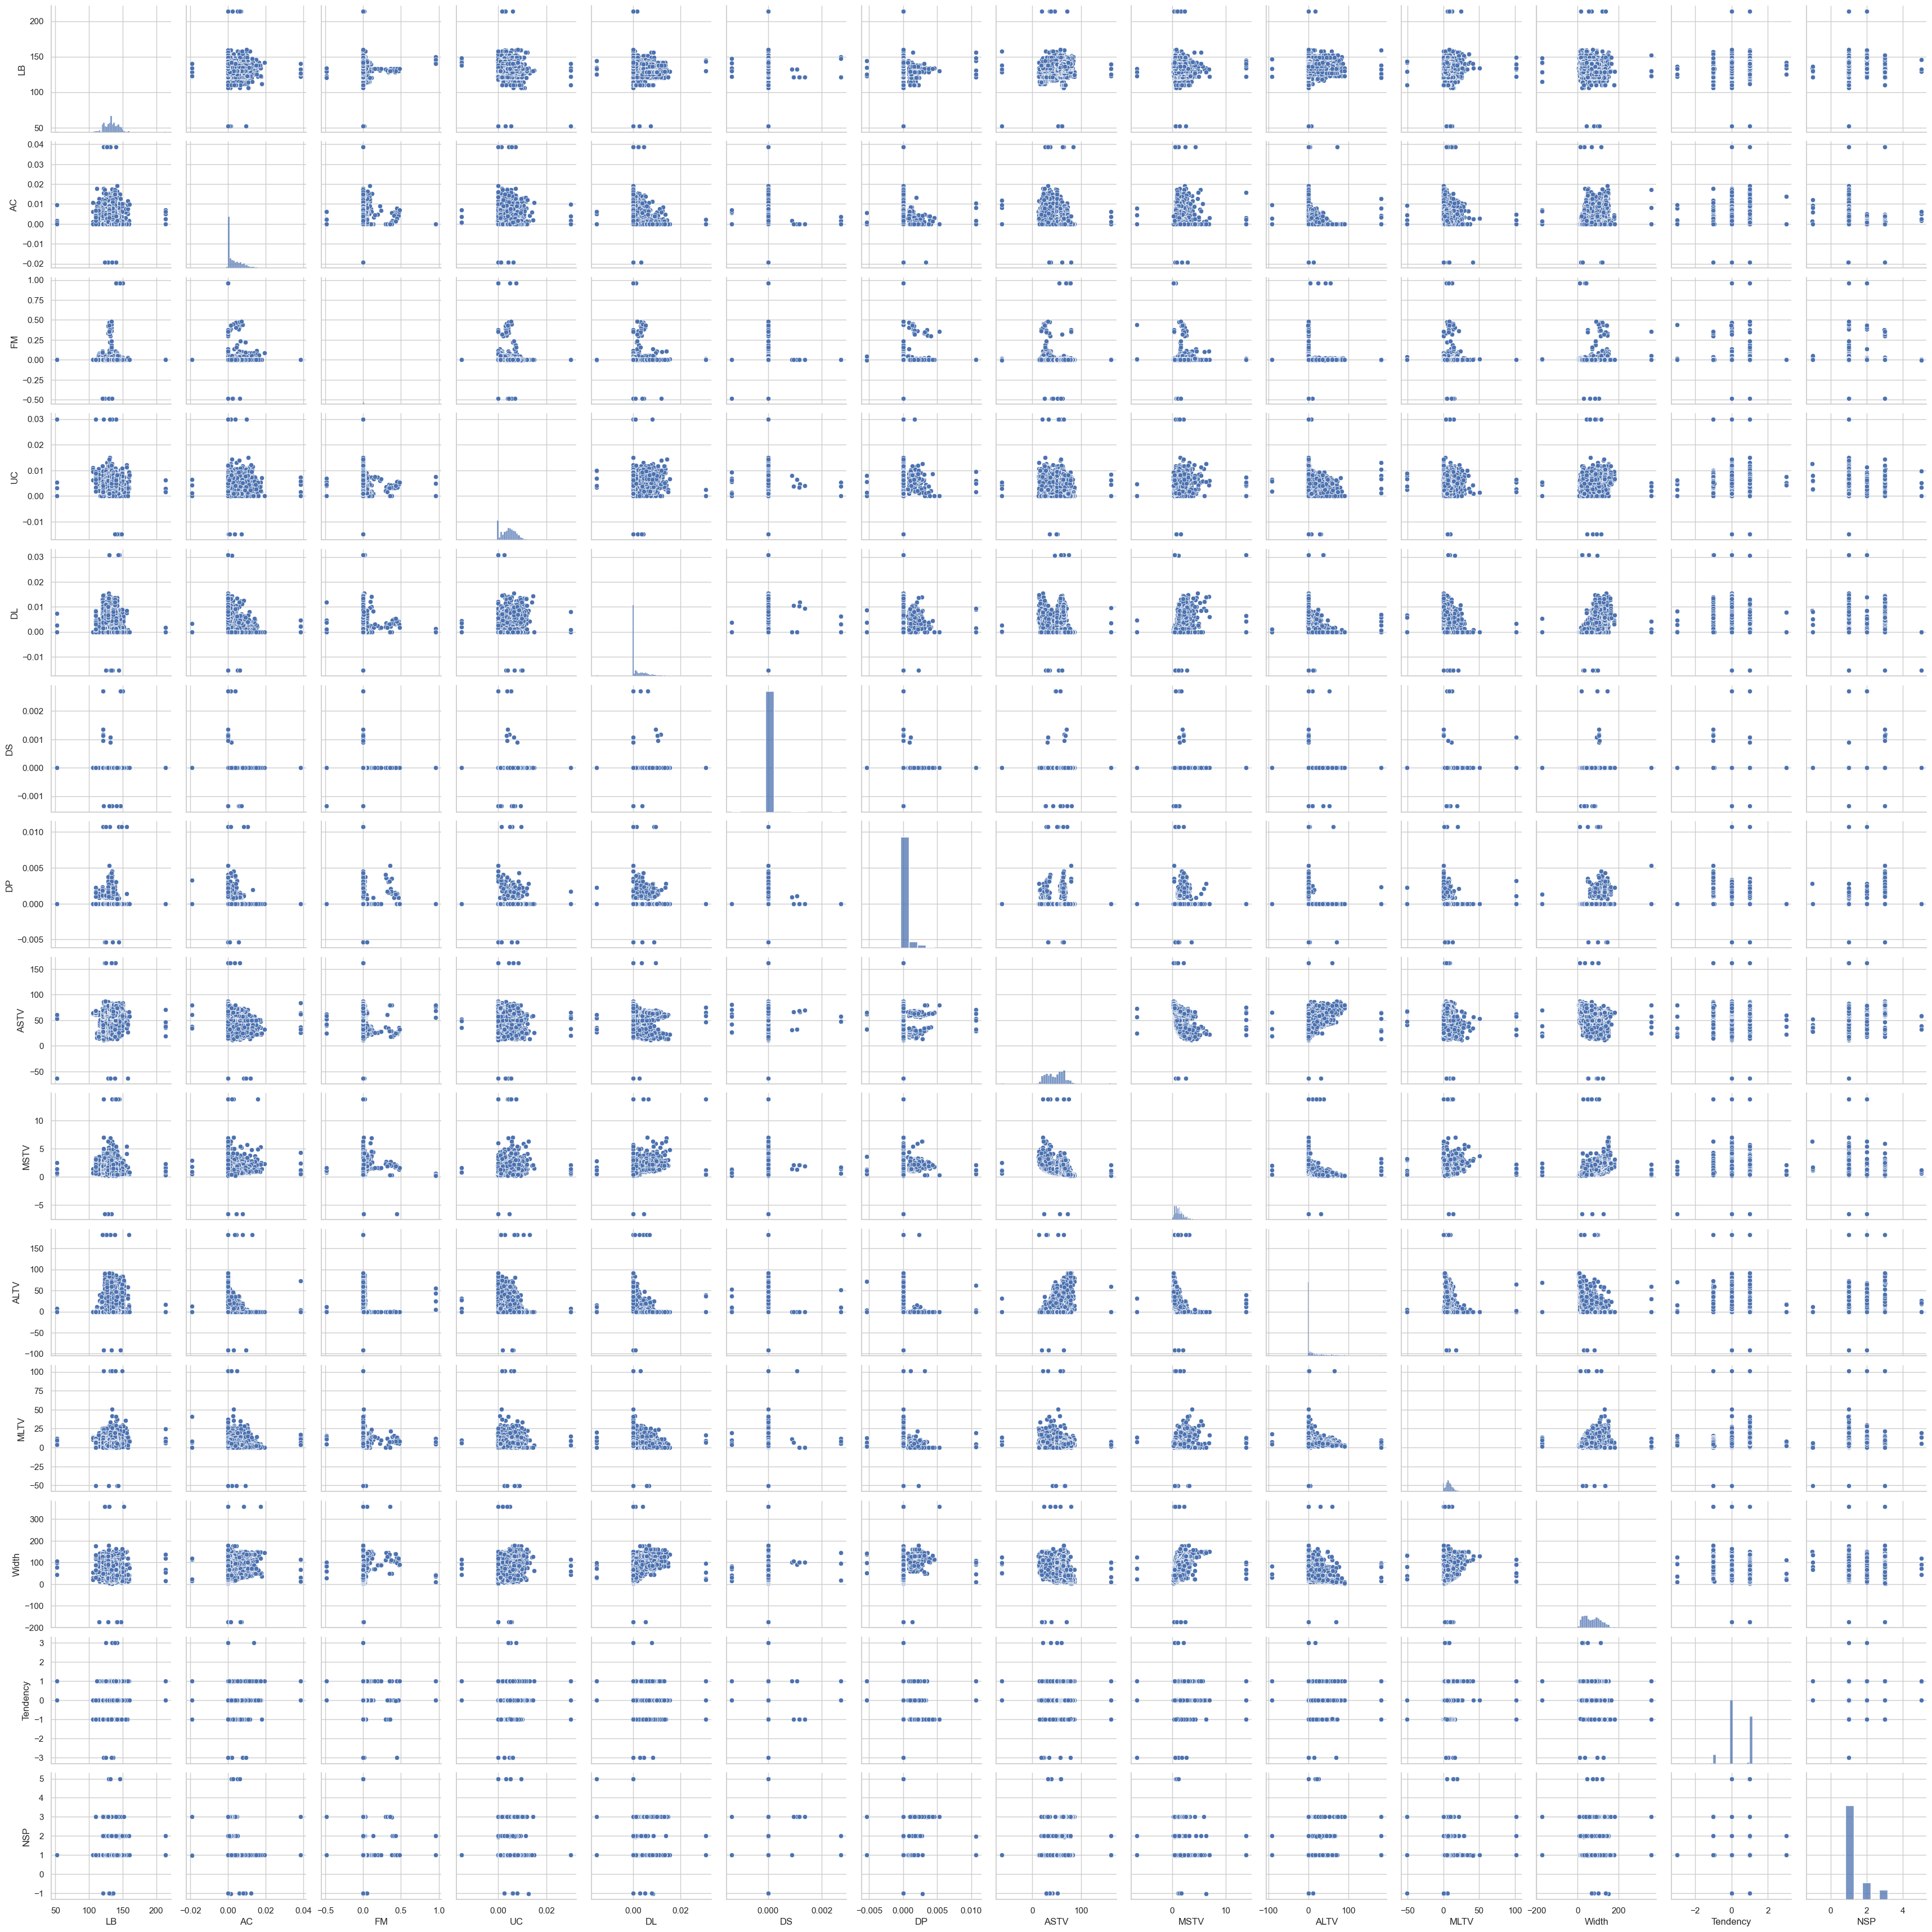

In [117]:
sns.pairplot(df)
plt.show()

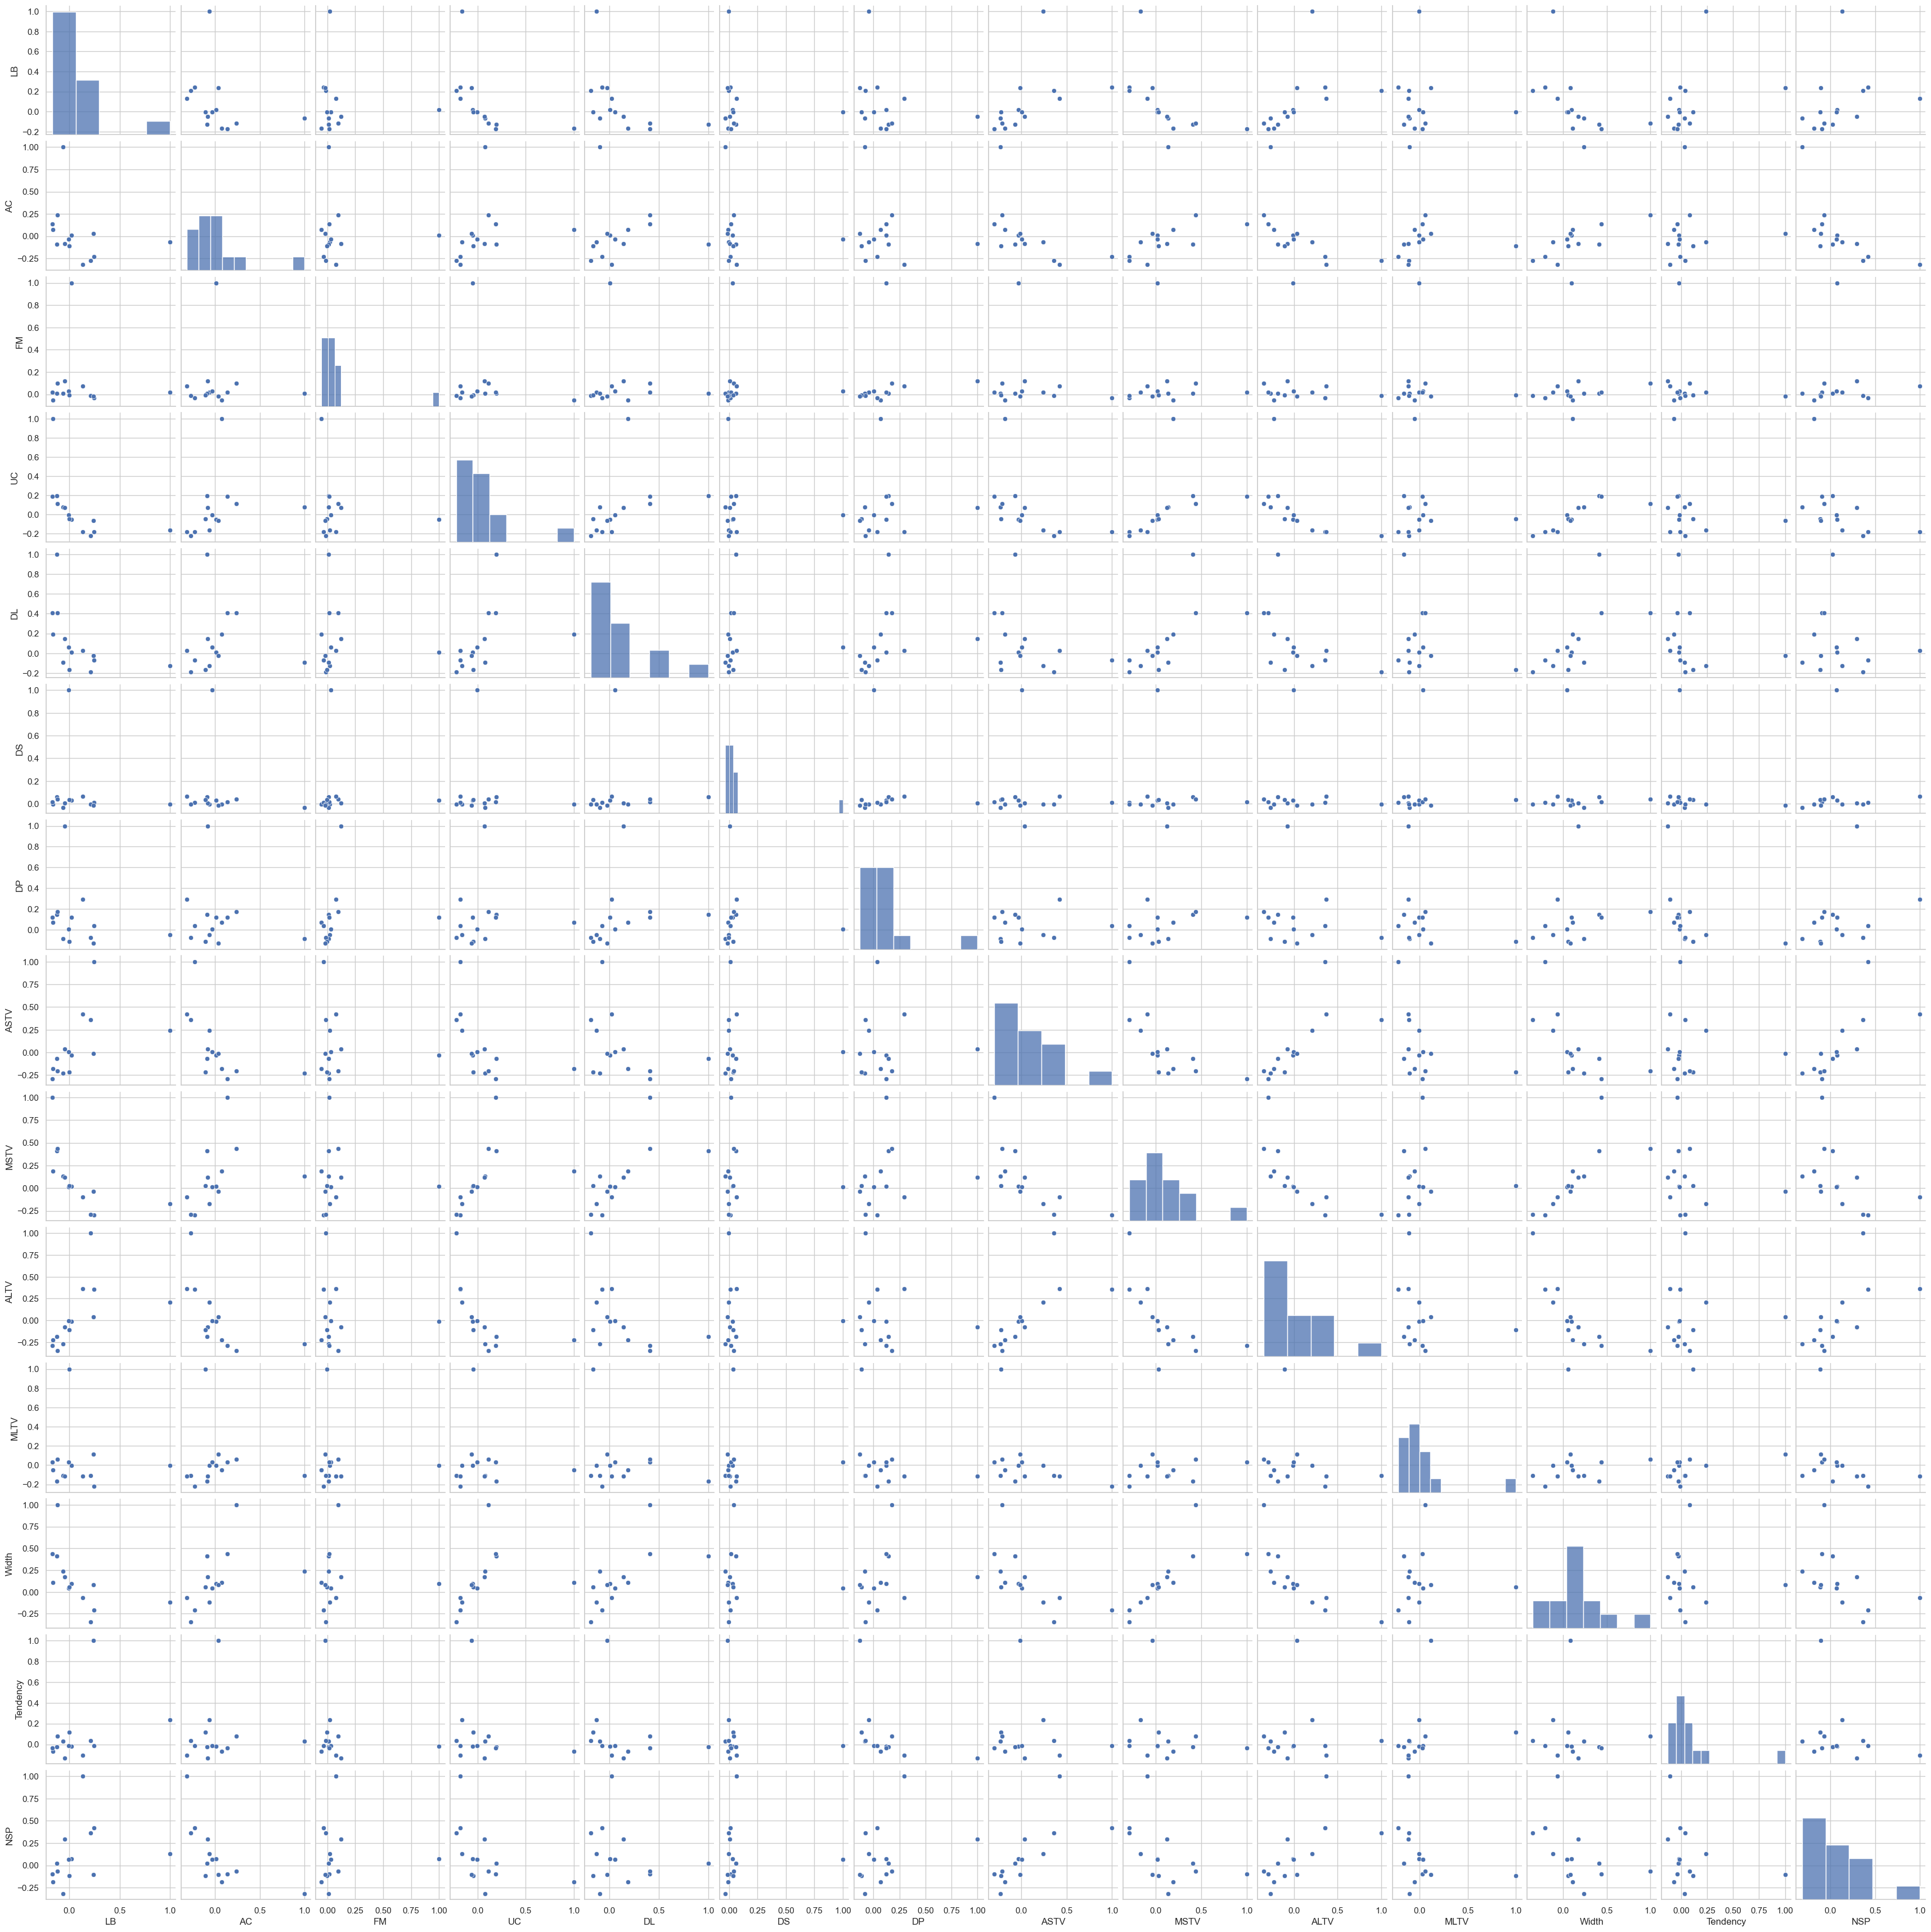

In [119]:
sns.pairplot(df.corr())
plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13

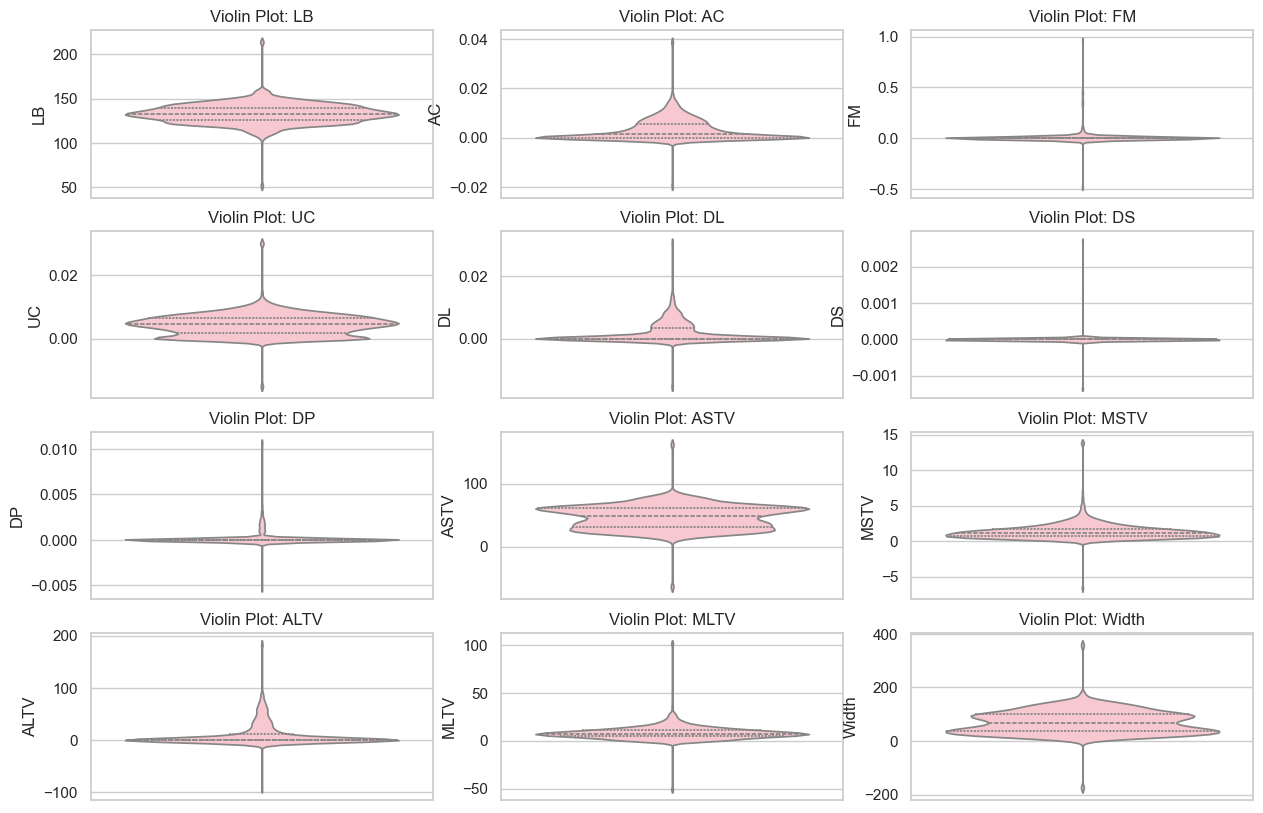

In [139]:
plt.figure(figsize=(15, 10))

# Generate violin plots for each numeric column
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)  # Adjust the grid size as necessary
    sns.violinplot(y=df[column], inner='quartile', color='pink')
    plt.title(f'Violin Plot: {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#### 4.	Pattern Recognition and Insights:
●	Identify any correlations between variables and discuss their potential implications
.-- After calculating the correlation matrix and visualizing it, look for significant correlations:

* Strong Positive Correlation (close to +1): Indicates that as one variable increases, the other also increases. This might imply a direct relationship where one variable affects the other.
* Strong Negative Correlation (close to -1): Indicates that as one variable increases, the other decreases. This may suggest an inverse relationship.
* Weak Correlation (close to 0): Indicates that there is no significant relationship between the two variables.


#### 5. Conclision
* outliers= these are datapoints,that are differ from other observation datapoints
* summary=it is statistical summerization of the dataset like mean,std.min,max etc
* correlation=Correlation measures the strength and direction of a linear relationship between two variables.it has range(-1,1) i,e relation between lb vs lb, and others
* Identifying correlations between variables provides valuable insights that can significantly impact decision-making in real life business strategy.